In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Base = pd.read_csv('Melt.csv')

In [16]:
#Los pasos siguientes permiten transformar la tabla para poder generar las vistas deseadas
isbn_long = pd.wide_to_long(Base.reset_index(), 
                            stubnames= ['VENTAS', 'COSTO', 'UB', 'GASTOS', 'VARIADO','FIJO','UT_OPERATIVA'], 
                            i=['Año', 'Month', 'EMPRESA'], 
                            j='Tipo', sep='_', suffix='\w+')

isbn_long_a = isbn_long.reset_index()

isbn_long_b = isbn_long_a.melt(id_vars=['Año', 'Month', 'EMPRESA', 'Tipo', 'index'])


isbn_long_b.dropna(inplace=True)

In [17]:
#A partir de los pasos previos se generó el archivo "wide-to-long". Manualmente se convirtió a número la columna de valores y se eliminaron los errores (null)
Base2 = pd.read_csv('wide-to-long_.csv')

In [18]:
#Filtros
Periodo = Base2['Año'] == 2021
isbn_long_2021 = Base2[Periodo]
Tipo_ = ['GASTOS', 'VARIADO', 'FIJO',
       'UT_OPERATIVA']
isbn_long_2021_2 = isbn_long_2021[isbn_long_2021.variable.isin(Tipo_)]

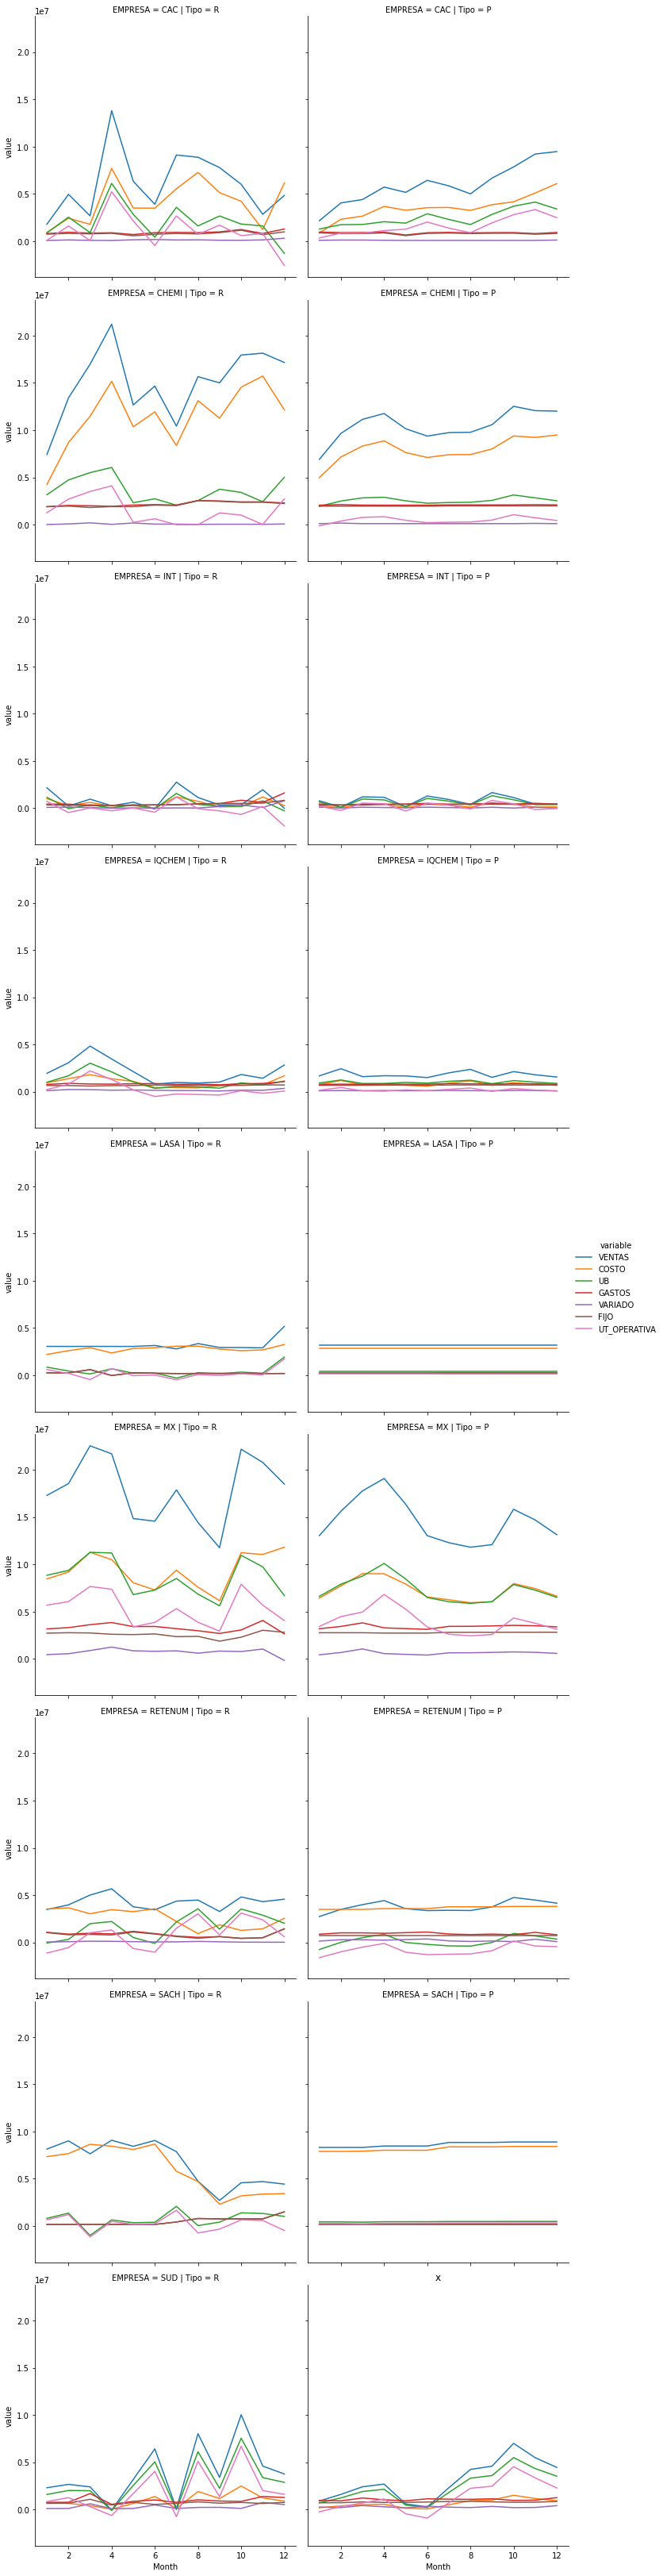

In [19]:
#Vista
sns.relplot(x="Month", y="value", 
            data=isbn_long_2021,
            kind="line", 
            row="EMPRESA",
            col="Tipo",
            hue="variable")

# Show plot
plt.title('x')
plt.show()

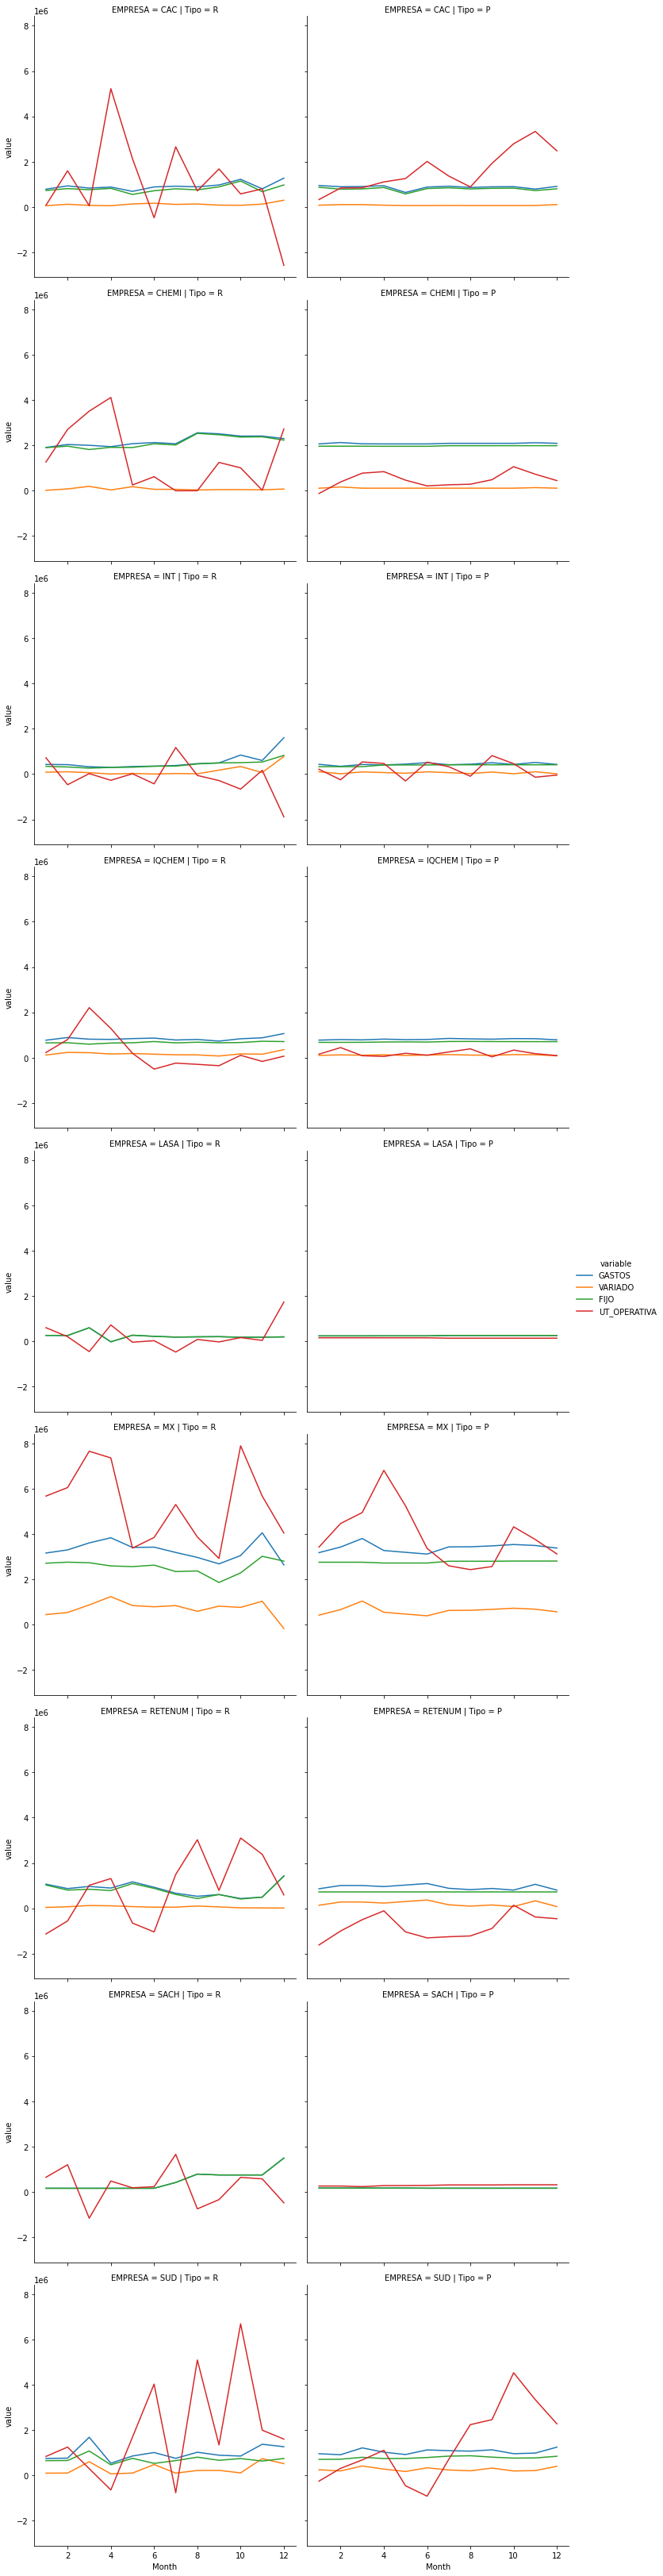

In [20]:

#Misma gráfica que la anterior, pero se muestran "Gastos","Variado","Fijo","Ut operativa"
sns.relplot(x="Month", y="value", 
            data=isbn_long_2021_2,
            kind="line", 
            row="EMPRESA",
            col="Tipo",
            hue="variable")

# Show plot
plt.show()